**Youtube_Comments_Analysis**

In this notebook we will analyse **'Comment Dataset'** of shape (691400, 4) from Youtube. 

**About Dataset -**
1.  **video_id** - Unique id
2.  **comment_text** - 	Comment posted on the video
3.  **likes**	- Likes received on a particular comment
4.  **replies** - Replies received on a particular comment

**Types of analysis we'll perform -**


1.   **Sentiment Analysis : Using Textblob**  - It is the act of using NLP to help understand the opinion of the public in a particular context in natural language.
2.   **Wordcloud Analysis : Using WordCloud** - It is a visual representation of word frequency. The more commonly the term appears within the text being analysed, the larger the word appears in the image generated.
3.   **Emoji's Analysis : Using Emoji** - Python package that allows us to use and work with emoji through a Python program. Will analyse most used emojis in the video comments.



#**Importing Libraries and dataset**

In [173]:
# Importing library for data handling and numerical operations
import pandas as pd
import numpy as np
import random as rnd
import math

# Importing library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

In [174]:
#Connecting google drive with colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [175]:
#Reading dataset and saving it in df
df = pd.read_csv('/content/drive/MyDrive/2. Journey/8. Data Analyst/Youtube Data Analysis/UScomments.csv',error_bad_lines=False)
df.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


#**Data Pre-Processing : General analysis & Handling null values**

**2.1.1 General Analysis**

In [176]:
# Checking Dimension
df.shape

(691400, 4)

In [177]:
# Give number of unique values.
df.nunique()

# result - So basically we are analysing comments under 2266 different videos. 

video_id          2266
comment_text    434076
likes             1284
replies            479
dtype: int64

In [178]:
# Number of null values in each column
df.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [179]:
# Drop missing values as they are very few
df.dropna(inplace=True)
df.shape

(691375, 4)

In [180]:
# To know the datatype of features and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691375 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691375 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691375 non-null  object
 3   replies       691375 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


In [181]:
# Changing Data type for 'likes' and 'replies'
# Comment may have emogi - So let it be in object
col_list = ['likes', 'replies']
#df[col_list] = df[col_list].astype('int64')
#df.info()

# result - ERROR - invalid literal for int() with base 10: 'likes'
# Their is some issue with 'likes' column values. 

In [182]:
# Some values can be numeric also, so before checking coverting whole column into string
df[col_list] = df[col_list].astype('str')

In [183]:
# Checking for values where it is not numeric
df[df['likes'].str.isnumeric() == False]

# result - Only 1, so deleting the row

,video_id,comment_text,likes,replies
41587,_ANP3HR1jsM,comment_text,likes,replies


In [184]:
# Keeping numeric value only in 'likes' column
df = df[df['likes'].str.isnumeric() == True]
df.shape

(691374, 4)

In [185]:
# Changing Data type for 'likes' and 'replies'
col_list = ['likes', 'replies']
df[col_list] = df[col_list].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691374 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691374 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691374 non-null  int64 
 3   replies       691374 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 26.4+ MB


In [186]:
# Give data summary
df.describe()

,likes,replies
count,691374.000000,691374.000000
mean,5.821172,0.425542
std,243.197037,9.923339
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,48772.000000,529.000000


**Observation -**

1.   We are analysing comments under 2266 different videos. 
2.   Values under likes column vary a lot.



#**Analysis 1 - Sentiment Analysis**

**Sentiment analysis** is the act of using NLP to help us understand the opinion of the public in a particular context in natural language. Textblob is a Python NLP library that uses a natural language toolkit (NLTK).

**Textblob** can be used for complex analysis and working with textual data. When a sentence is passed into Textblob it gives two outputs, which are polarity and subjectivity. Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment. Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.




In [187]:
# We are using textblob which is a NLP library 
!pip install textblob
from textblob import TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Example to understand the textblob -**

In [188]:
# Example 1 -
TextBlob('Hello World').sentiment.polarity

0.0

In [189]:
# Example 2 -
TextBlob('Awesome content, totally love it 😍').sentiment.polarity

# To Note - Also process emoji

0.75

In [190]:
# Example 3 -
TextBlob("It's not funny").sentiment.polarity

-0.125

**Calculating polarity using textblob -**

In [191]:
# Assigning polarity of each comment into a new column
df['polarity'] = df['comment_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


**Analysis -**

In [192]:
# Majority of comments are positive or negative?
comments_positive = df[df['polarity'] == 1]
comments_negative = df[df['polarity'] == -1]
print(comments_negative.shape)
print(comments_positive.shape)

# result - POSITIVE

(3508, 5)
(19390, 5)


In [193]:
# Which video get most positive comments
positive = comments_positive.groupby('video_id')['polarity'].count().sort_values(ascending=False).to_frame().reset_index()
positive.rename(columns = {'polarity' : 'count'}, inplace = True)
positive.head()

# result - iKzRIweSBLA got most most positive comments

,video_id,count
0,iKzRIweSBLA,84
1,SmfWvo4cMpU,69
2,Z7R8XRKqHAI,65
3,IYvEhgYy35I,60
4,5Xe0Qd6bUFo,59


In [194]:
# Plotting the graph using plotly (better)
import plotly.express as px
plt.figure(figsize=(8,4))
px.bar(data_frame = positive[0:10], x='video_id', y='count')

<Figure size 576x288 with 0 Axes>

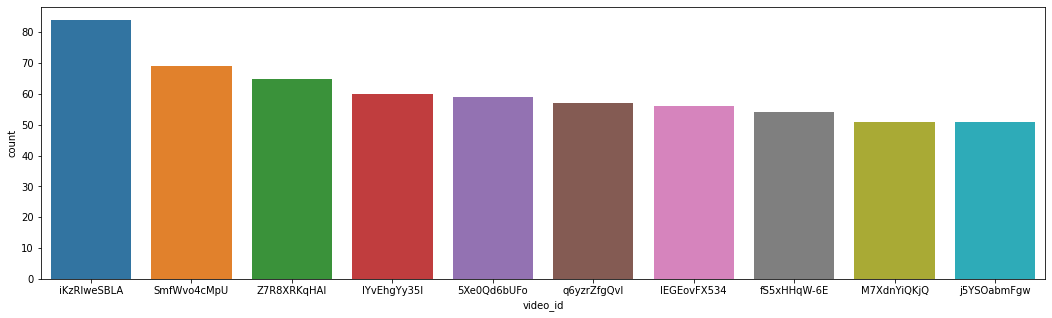

In [195]:
# Plotting the graph using seaborn
plt.figure(figsize=(18,5))
sns.barplot(x='video_id', y='count', data=positive[0:10])

In [196]:
# Which video get most negative comments
negative = comments_negative.groupby('video_id')['polarity'].count().sort_values(ascending=False).to_frame().reset_index()
negative.rename(columns = {'polarity' : 'count'}, inplace = True)
negative.head()

# result - 8oyf8Ecwo-Y got most most negative comments

,video_id,count
0,8oyf8Ecwo-Y,25
1,Oo0NJsr5m4I,24
2,6l5P7jHUcjI,20
3,RsG37JcEQNw,19
4,1QWLyi03twg,17


In [197]:
# Plotting the graph using plotly (better)
plt.figure(figsize=(8,4))
px.bar(data_frame = negative[0:10], x='video_id', y='count')

<Figure size 576x288 with 0 Axes>

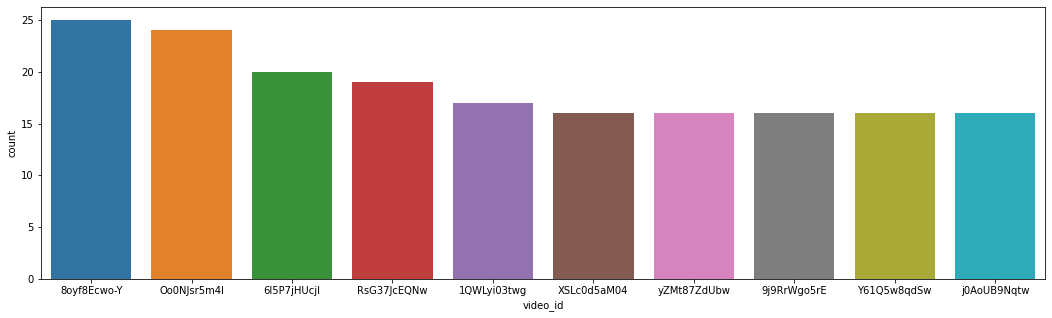

In [198]:
# Plotting the graph using seaborn
plt.figure(figsize=(18,5))
sns.barplot(x='video_id', y='count', data=negative[0:10])

#**Analysis 2 - Wordcloud Analysis**

A **'word cloud'** is a visual representation of word frequency. The more commonly the term appears within the text being analysed, the larger the word appears in the image generated.

**'Stop words'**are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

**Analysing extreme posivite and negative comments for wordcloud.**

In [199]:
comments_positive = df[df['polarity'] == 1]
comments_positive.shape

(19390, 5)

In [200]:
comments_negative = df[df['polarity'] == -1]
comments_negative.shape

(3508, 5)

In [201]:
#!pip install wordcloud & stopwords
from wordcloud import WordCloud , STOPWORDS

In [202]:
# Here we input all comments as one, hence concading all positive comments
total_comments_positive = ' '.join(comments_positive['comment_text'])
total_comments_positive[0:100]

'yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as bes'

(-0.5, 399.5, 199.5, -0.5)

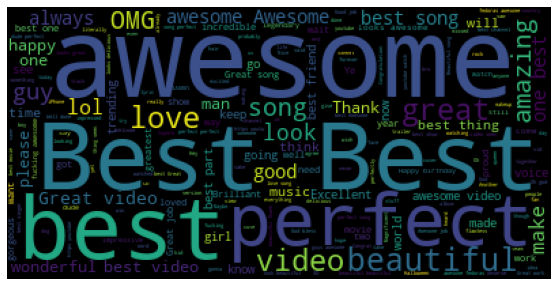

In [203]:
#Ploting chart for all positive comments
wordcloud = WordCloud(stopwords= set(STOPWORDS)).generate(total_comments_positive)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [204]:
# Here we input all comments as one, hence concading all negative comments
total_comments_negative = ' '.join(comments_negative['comment_text'])
total_comments_negative[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

(-0.5, 399.5, 199.5, -0.5)

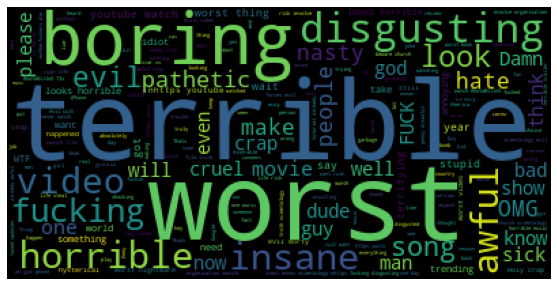

In [205]:
#Ploting chart for all negative comments
wordcloud = WordCloud(stopwords= set(STOPWORDS)).generate(total_comments_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#**Analysis 3 - Emoji's Analysis**

In [206]:
# Every emoji has a Unicode associated with it
# Example - 
print('\U0001F600')

😀


**Emoji library** is a Python package that allows us to use and print emojis through a Python program, and we can even use this module to use emojis inside an application we are creating using Python.

In [207]:
!pip install emoji
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
# Example - How to  extract emoji from below comment
comment = 'trending 😉'
[a for a in comment if a in emoji.UNICODE_EMOJI_ENGLISH]

['😉']

In [209]:
# Analysis whole 'comment_text' column and saying all emoji in a list
emoji_list=[]
for comment in df['comment_text']:
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(char)

len(emoji_list)

294549

In [210]:
# Looking at the list
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [211]:
# Analysing most common emoji used
from collections import Counter
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [212]:
# How to access 
print(Counter(emoji_list).most_common(10)[0][0])
print(Counter(emoji_list).most_common(10)[1][0])

😂
😍


In [213]:
# Plotting graph
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [214]:
# Plotting graph for top 10 emojis
emojis=[Counter(emoji_list).most_common(10)[i][0] for i in range(10)]
freqs=[Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [215]:
# Plotting the graph using plotly (better)
import plotly.graph_objs as go
from plotly.offline import iplot
trace = go.Bar(x=emojis,y=freqs)
iplot([trace])

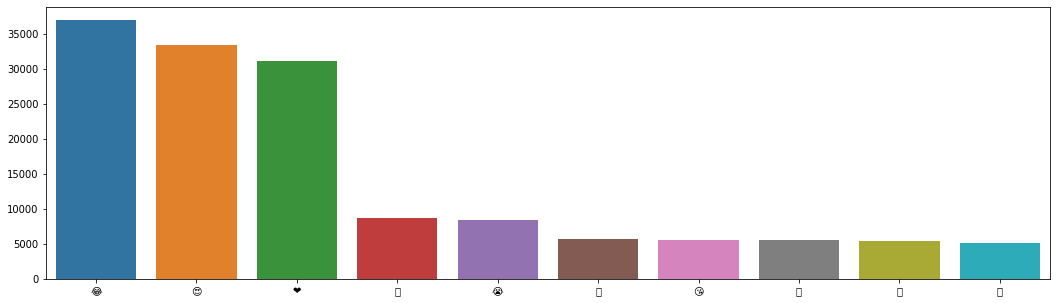

In [216]:
# Plotting the graph using seaborn
plt.figure(figsize=(18,5))
sns.barplot(x=emojis, y=freqs)

In [217]:
# To know which emoji(s) is maximum used in positive comments - 
positive_emoji_list=[]

for comment in comments_positive['comment_text'] :
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            positive_emoji_list.append(char)

len(positive_emoji_list)

7938

In [218]:
# Plotting graph for top 10 emojis using plotly
emojis=[Counter(positive_emoji_list).most_common(10)[i][0] for i in range(10)]
freqs=[Counter(positive_emoji_list).most_common(10)[i][1] for i in range(10)]

trace = go.Bar(x=emojis,y=freqs)
iplot([trace])

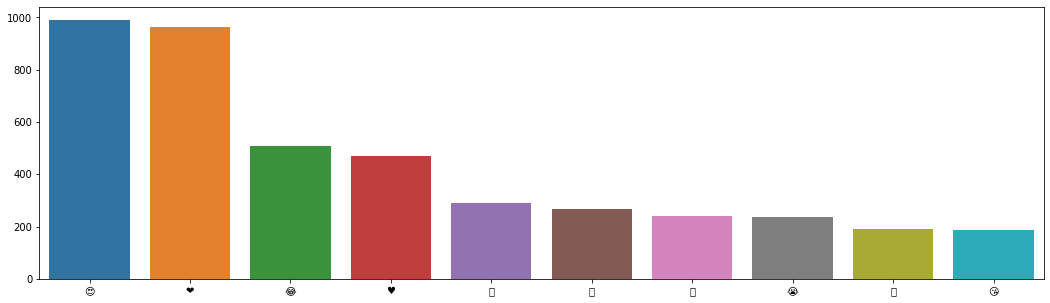

In [219]:
# Plotting the graph using seaborn for top 10 emojis
plt.figure(figsize=(18,5))
sns.barplot(x=emojis, y=freqs)

In [220]:
# To know which emoji(s) is maximum used in negative comments - 
negative_emoji_list=[]

for comment in comments_negative['comment_text'] :
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            negative_emoji_list.append(char)

len(negative_emoji_list)

625

In [221]:
# Plotting graph for top 10 emojis using plotly
emojis=[Counter(negative_emoji_list).most_common(10)[i][0] for i in range(10)]
freqs=[Counter(negative_emoji_list).most_common(10)[i][1] for i in range(10)]

trace = go.Bar(x=emojis,y=freqs)
iplot([trace])

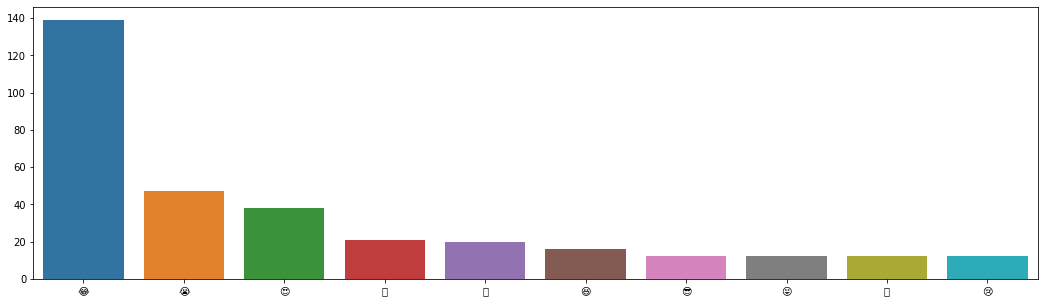

In [222]:
# Plotting the graph using seaborn for top 10 emojis
plt.figure(figsize=(18,5))
sns.barplot(x=emojis, y=freqs)

In [223]:
# To know which emoji(s) is maximum used in neutral comments - 
neutral_emoji_list=[]
neutral_comments = df[df['polarity'] == 0]
for comment in neutral_comments['comment_text'] :
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            neutral_emoji_list.append(char)

len(neutral_emoji_list)

150224

In [224]:
# Plotting graph for top 5 emojis using plotly
emojis=[Counter(neutral_emoji_list).most_common(10)[i][0] for i in range(10)]
freqs=[Counter(neutral_emoji_list).most_common(10)[i][1] for i in range(10)]

trace = go.Bar(x=emojis,y=freqs)
iplot([trace])

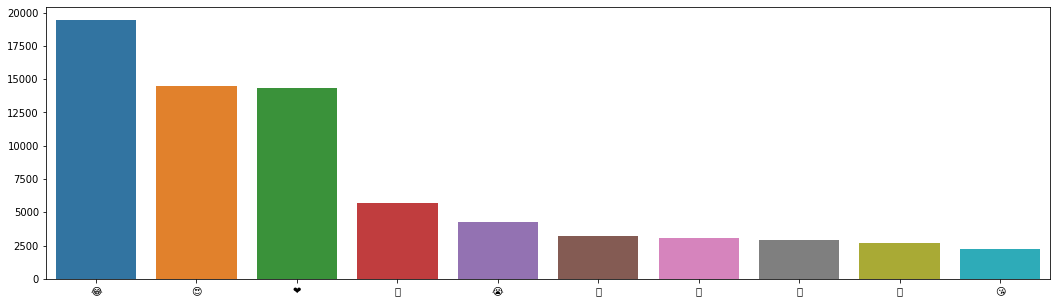

In [225]:
# Plotting the graph using seaborn for top 10 emojis
plt.figure(figsize=(18,5))
sns.barplot(x=emojis, y=freqs)